In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io
import tensorflow
import tqdm
import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Conv2D, Dropout, Permute
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
#or dirname, _, _ in os.walk(''):
  #      print(dirname)

In [4]:
from __future__ import absolute_import, division , print_function, unicode_literals

from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [9]:
training_dir = "Training"
validation_dir = "Validation"
test_dir = "Testing"

# **Data Augmentation and Preprocessing**

In [10]:
image_size = (224, 224)
batch_size = 32

In [11]:
augmented_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

base_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = augmented_datagen.flow_from_directory(
    training_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)


validation_generator = base_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = base_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

Found 340 images belonging to 2 classes.


Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# Model training

importation

In [12]:
# Importing the pretrained models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet import ResNet50

In [13]:
# Importing MobileNet
pretrained_mobilenet_model = MobileNet(weights='imagenet', include_top=False)
pretrained_mobilenet_model.trainable = False

# Importing ResNet50
pretrained_resnet50_model = ResNet50(weights='imagenet', include_top=False)
pretrained_resnet50_model.trainable = False

# Importing VGG16
pretrained_vgg16_model = VGG16(weights='imagenet', include_top=False)
pretrained_vgg16_model.trainable = False




58889256/58889256 [==============================] - 5s 0us/step


preparation of model

In [14]:
mobilenet_model = Sequential()
mobilenet_model.add(pretrained_mobilenet_model)
mobilenet_model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)))
mobilenet_model.add(Conv2D(512, (3, 3), activation='relu'))
mobilenet_model.add(Conv2D(256, (3, 3), activation='relu'))
mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dropout(0.2))
mobilenet_model.add(Dense(1, activation='sigmoid'))
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 conv2d (Conv2D)             (None, None, None, 512)   4719104   
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 512)   2359808   
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 256)   1179904   
                                                                 
 global_average_pooling2d (  (None, 256)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 256)               

In [15]:
resnet50_model = Sequential()
resnet50_model.add(pretrained_resnet50_model)
resnet50_model.add(Conv2D(1024, (3, 3), activation='relu', input_shape=(224, 224, 3)))
resnet50_model.add(Conv2D(1024, (3, 3), activation='relu'))
resnet50_model.add(Conv2D(512, (3, 3), activation='relu'))
resnet50_model.add(GlobalAveragePooling2D())
resnet50_model.add(Dropout(0.2))
resnet50_model.add(Dense(1, activation='sigmoid'))
resnet50_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 1024   18875392  
                             )                                   
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 1024   9438208   
                             )                                   
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 512)   4719104   
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                            

In [16]:
vgg16_model = Sequential()
vgg16_model.add(pretrained_vgg16_model)
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
vgg16_model.add(Conv2D(256, (3, 3), activation='relu'))
vgg16_model.add(Conv2D(128, (3, 3), activation='relu'))
vgg16_model.add(GlobalAveragePooling2D())
vgg16_model.add(Dropout(0.2))
vgg16_model.add(Dense(1, activation='sigmoid'))
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 256)   1179904   
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 256)   590080    
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 128)   295040    
                                                                 
 global_average_pooling2d_2  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

training of model

In [17]:
epochs = 250
patience = 25

In [18]:
mobilenet_loss_early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=patience,
    verbose=1
)

mobilenet_accuracy_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    verbose=1
)
mobilenet_checkpoint_loss = ModelCheckpoint(
    filepath='mobilenet_checkpoint_loss.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)

mobilenet_checkpoint_accuracy = ModelCheckpoint(
    filepath='mobilenet_checkpoint_accuracy.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

mobilenet_callbacks = [
    mobilenet_checkpoint_loss,
    mobilenet_checkpoint_accuracy,
    mobilenet_loss_early_stopping,
    mobilenet_accuracy_early_stopping,
    CSVLogger(filename='mobilenet_training_log.csv')
]


In [19]:
vgg16_loss_early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=patience,
    verbose=1
)

vgg16_accuracy_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    verbose=1
)

vgg16_checkpoint_loss = ModelCheckpoint(
    filepath='vgg16_checkpoint_loss.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)

vgg16_checkpoint_accuracy = ModelCheckpoint(
    filepath='vgg16_checkpoint_accuracy.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

vgg16_callbacks = [
    vgg16_checkpoint_loss,
    vgg16_checkpoint_accuracy,
    vgg16_loss_early_stopping,
    vgg16_accuracy_early_stopping,
    CSVLogger(filename='vgg16_training_log.csv')
]


In [20]:
resnet50_loss_early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=patience,
    verbose=1
)

resnet50_accuracy_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    verbose=1
)

resnet50_checkpoint_loss = ModelCheckpoint(
    filepath='resnet50_checkpoint_loss.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)

resnet50_checkpoint_accuracy = ModelCheckpoint(
    filepath='resnet50_checkpoint_accuracy.h5',
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

resnet50_callbacks = [
    resnet50_checkpoint_loss,
    resnet50_checkpoint_accuracy,
    resnet50_loss_early_stopping,
    resnet50_accuracy_early_stopping,
    CSVLogger(filename='resnet50_training_log.csv')
]

In [21]:
mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=mobilenet_callbacks
)

Epoch 1/250


11/11 [==============================] - ETA: 0s - loss: 5.9309 - accuracy: 0.5353
Epoch 1: val_loss improved from inf to 0.60763, saving model to mobilenet_checkpoint_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.72500, saving model to mobilenet_checkpoint_accuracy.h5
11/11 [==============================] - 17s 1s/step - loss: 5.9309 - accuracy: 0.5353 - val_loss: 0.6076 - val_accuracy: 0.7250
Epoch 2/250
11/11 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.7118
Epoch 2: val_loss improved from 0.60763 to 0.42303, saving model to mobilenet_checkpoint_loss.h5

Epoch 2: val_accuracy improved from 0.72500 to 0.82500, saving model to mobilenet_checkpoint_accuracy.h5
11/11 [==============================] - 15s 1s/step - loss: 0.6051 - accuracy: 0.7118 - val_loss: 0.4230 - val_accuracy: 0.8250
Epoch 3/250
11/11 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.8412
Epoch 3: val_loss did not improve from 0.42303

Epoch 3:

In [22]:
vgg16_history = vgg16_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=vgg16_callbacks
)

Epoch 1/250
11/11 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.5029
Epoch 1: val_loss improved from inf to 0.69862, saving model to vgg16_checkpoint_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to vgg16_checkpoint_accuracy.h5
11/11 [==============================] - 37s 3s/step - loss: 1.0038 - accuracy: 0.5029 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 2/250
11/11 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5382
Epoch 2: val_loss did not improve from 0.69862

Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 32s 3s/step - loss: 0.6926 - accuracy: 0.5382 - val_loss: 0.7188 - val_accuracy: 0.5000
Epoch 3/250
11/11 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5324
Epoch 3: val_loss improved from 0.69862 to 0.66127, saving model to vgg16_checkpoint_loss.h5

Epoch 3: val_accuracy improved from 0.50000 to 0.61250, saving model to vgg1

In [23]:
resnet50_history = resnet50_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=resnet50_callbacks
)

Epoch 1/250
11/11 [==============================] - ETA: 0s - loss: 8.2374 - accuracy: 0.5088
Epoch 1: val_loss improved from inf to 0.85308, saving model to resnet50_checkpoint_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to resnet50_checkpoint_accuracy.h5
11/11 [==============================] - 39s 3s/step - loss: 8.2374 - accuracy: 0.5088 - val_loss: 0.8531 - val_accuracy: 0.5000
Epoch 2/250
11/11 [==============================] - ETA: 0s - loss: 0.7429 - accuracy: 0.5088
Epoch 2: val_loss improved from 0.85308 to 0.71122, saving model to resnet50_checkpoint_loss.h5

Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 33s 3s/step - loss: 0.7429 - accuracy: 0.5088 - val_loss: 0.7112 - val_accuracy: 0.5000
Epoch 3/250
11/11 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.4941
Epoch 3: val_loss improved from 0.71122 to 0.69170, saving model to resnet50_checkpoint_loss.h5

Epoch 3: val_accur

Visualisation

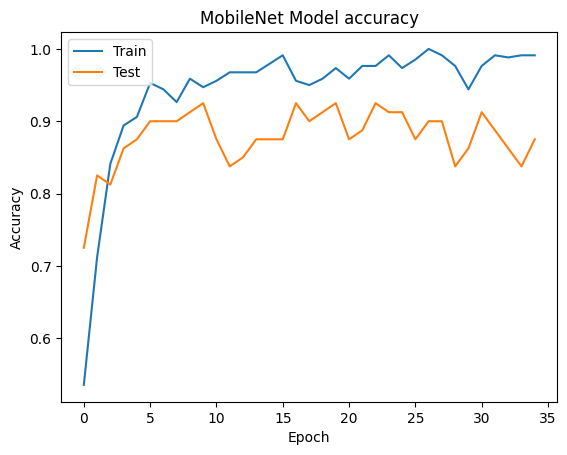

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('MobileNet Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

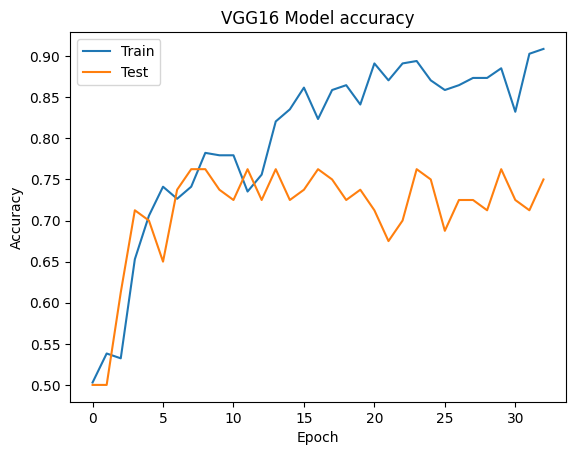

In [25]:
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

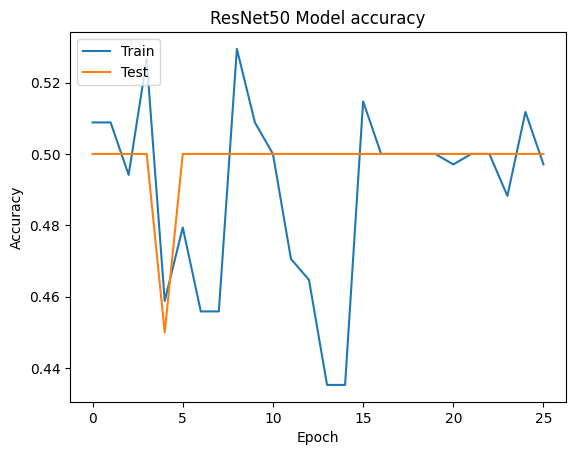

In [26]:
plt.plot(resnet50_history.history['accuracy'])
plt.plot(resnet50_history.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()